In [17]:
import numpy as np
from numpy import fft
import matplotlib.pyplot as plt


In [35]:
def input_siganl(t, sample_rate):
    f = 1
    x = np.linspace(0, t, int(t * sample_rate), endpoint = False)
    phase = np.pi/3
    # return (np.sin(f * 2 * np.pi * x + phase))
    return (np.sin(f * 2 * np.pi * x + phase) +    
            np.sin(3 * f * 2 * np.pi * x + phase) / 2 + 
            np.sin(4 * f * 2 * np.pi * x) / 5 +
            np.sin(8 * f * 2 * np.pi * x) / 3)

In [37]:
t = 2              # 取樣時間
sample_rate = 800  # 取樣率，每秒取幾個樣本
samples = input_siganl(t, sample_rate)
# get data_stock's infomation
data = input_siganl(t, sample_rate)
array_data = np.array(data)
n_data = array_data.size
time_data = np.arange(0, n_data)

# detrend data
# find linear trend in data
Polynomial = np.polyfit(time_data, array_data, 1)
data_notrend = array_data - Polynomial[0] * time_data    # detrended x

# Phase correction
data_notrend_phase = np.unwrap(np.angle(np.fft.fft(data_notrend)))

# fft process
data_freqdom = fft.fft(data_notrend, n=n_data)
frequence = fft.fftfreq(n=n_data, d=1)
f_positive = frequence[np.where(frequence > 0)]
data_freqdom_positive = data_freqdom[np.where(frequence > 0)]

# sort indexes
indexes = list(range(f_positive.size))      # frequencies
# sort method 1
# indexes.sort(key = lambda i: np.absolute(frequence[i]))     # sort indexes by frequency, lower -> higher
# sort method 2 :
# sort indexes by amplitudes, lower -> higher
indexes.sort(key=lambda i: np.absolute(data_freqdom[i]))
indexes.reverse()       # sort indexes by amplitudes, higher -> lower

# get data_all_time'size
time_transfer = np.arange(0, n_data*2)
count = 0
# get harmonics
harmonics = {}
for j in indexes:
    if count < 4:
        ampli = np.absolute(
            data_freqdom_positive[j]) / n_data     # amplitude
        phase = np.angle(data_freqdom_positive[j]) - data_notrend_phase[j]      # phase correction
        harmonics[j] = ampli * \
            np.cos(2 * np.pi * f_positive[j] * time_transfer + phase)

        print(f'ampli={ampli}, f_positive={f_positive[j]}, phase={phase}')
        print(time_transfer)
        count+=1

ampli=0.034453319249803716, f_positive=0.001875, phase=2.006352563575476
[   0    1    2 ... 3197 3198 3199]
ampli=0.10335942643660724, f_positive=0.000625, phase=1.5727598222033892
[   0    1    2 ... 3197 3198 3199]
ampli=0.014766087767254889, f_positive=0.004375, phase=2.046791369301161
[   0    1    2 ... 3197 3198 3199]
ampli=0.006081091535688854, f_positive=0.010625, phase=-3.1069464755141505
[   0    1    2 ... 3197 3198 3199]


(-5.0, 5.0)

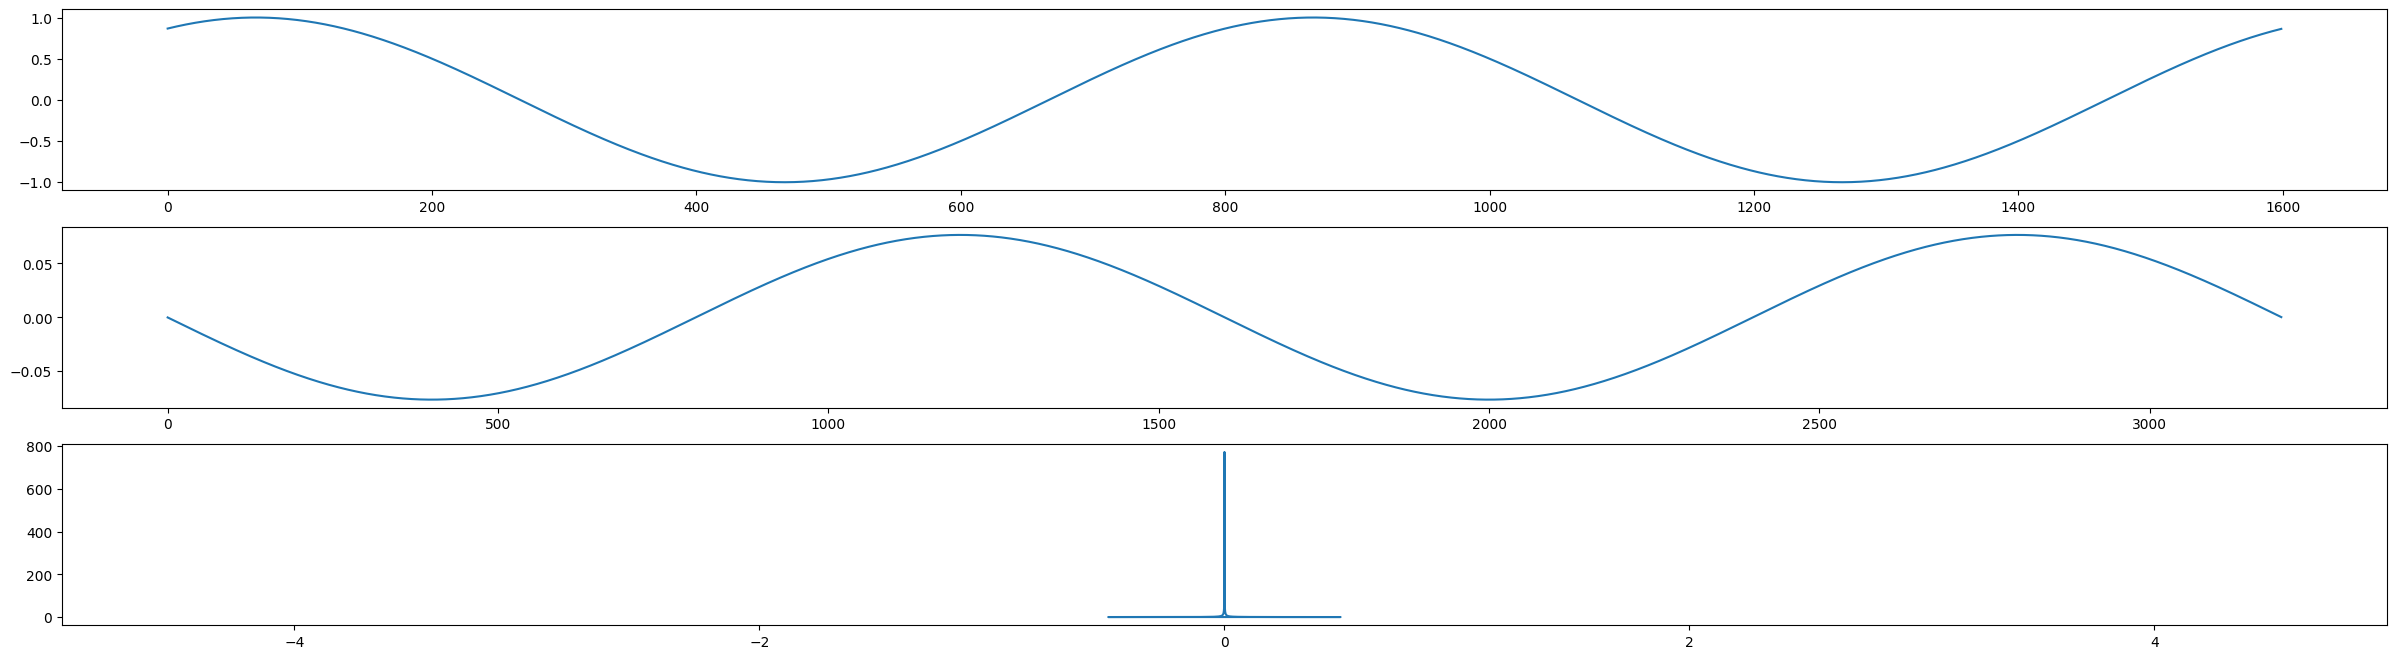

In [30]:
fig, axes = plt.subplots(3, 1, figsize=(30, 8))
axes[0].plot(data)
axes[1].plot(harmonics[0])
axes[2].plot(frequence, abs(data_freqdom), label="real")
# axes[2].plot(data_freqdom)
axes[2].set_xlim(-5, 5)

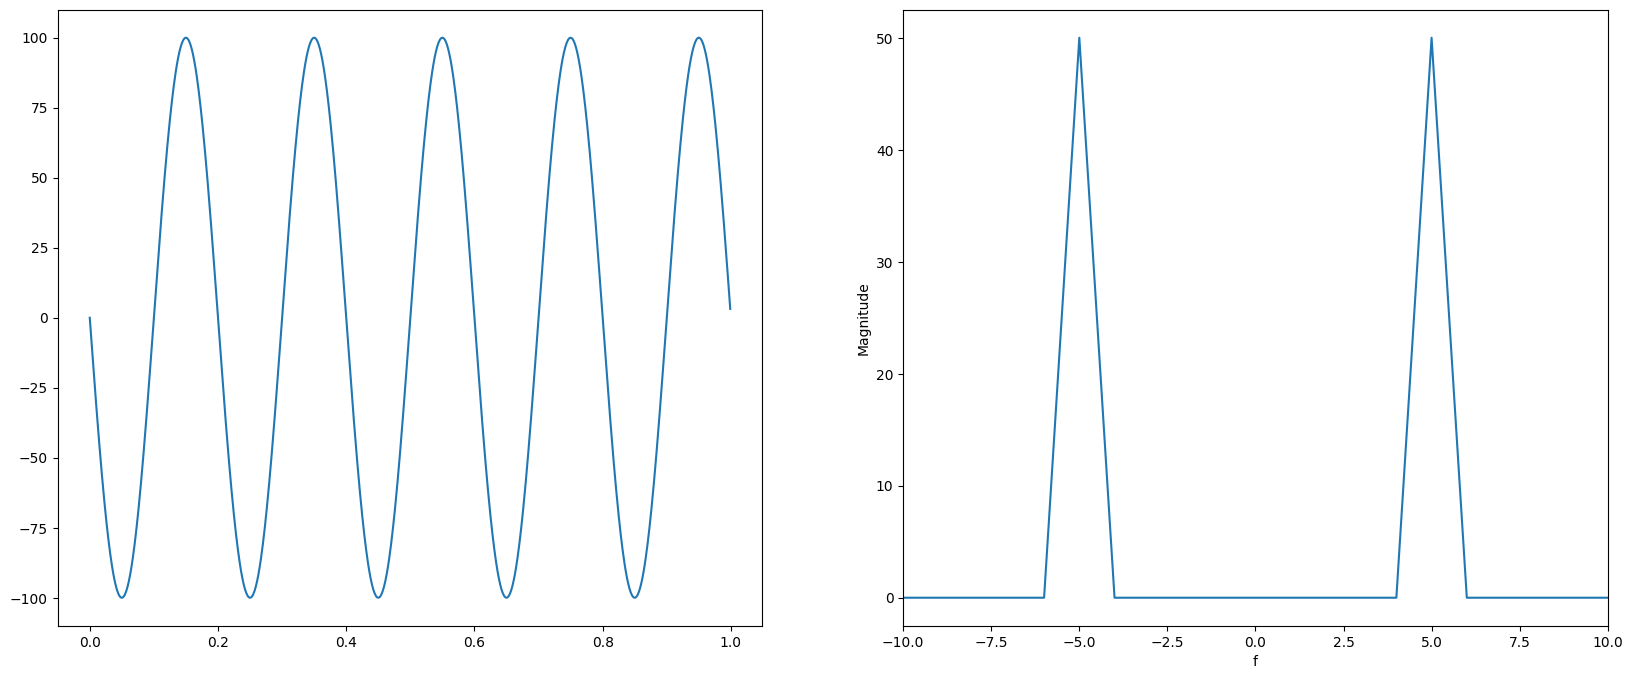

In [65]:
import numpy as np
from numpy.fft import fft, fftshift, fftfreq
import matplotlib.pyplot as plt

# time，1000 個 sample 點
t = np.linspace( 0, 1, 1000, endpoint = False )
# 弦波 原始訊號
phase = np.pi/2
amp = 100
x = amp*np.cos( 2 * np.pi * 5 * t + phase)

## fft 計算
X = fft( ( x ) )
# 強度
Xm = abs( X )/1000

# 強度頻譜
fig, axes = plt.subplots(1, 2, figsize=(20, 8))
axes[0].plot(t, x)
# n 為樣本數， d 為取樣週期 (1 second)
# fftshift 用來平移，以原點為中心
f = fftshift( fftfreq( 1000, 0.001 ) )
X = fftshift( fft( x ) )
Xm = abs( X )/1000


axes[1].plot( f, Xm )
axes[1].set_xlim(-10, 10)
axes[1].set_xlabel( 'f' )
axes[1].set_ylabel( 'Magnitude' )

plt.show( )

In [66]:
import numpy as np

# 定義原始信號函數
def signal_func(t, A, f, phase):
    return A * np.cos(2 * np.pi * f * t + phase)

# 設置參數
A = 1      # 振幅
f = 10     # 頻率
phase = 0  # 相位差

# 設置時間軸
t = np.linspace(0, 1, 1000)

# 計算原始信號
signal = signal_func(t, A, f, phase)

# 計算傅立葉變換
fft_signal = np.fft.fft(signal)

# 計算頻率軸
freqs = np.fft.fftfreq(len(signal), t[1] - t[0])

# 找到頻率為f的正弦波分量的索引
idx = np.where(np.round(freqs) == f)[0][0]

# 計算該分量的振幅和相位
A_fft = np.abs(fft_signal[idx]) / len(signal)
phase_fft = np.angle(fft_signal[idx])

# 打印結果
print('原始信號正弦波分量的振幅為：', A_fft)
print('原始信號正弦波分量的相位差為：', phase_fft)


原始信號正弦波分量的振幅為： 0.5001678413410016
原始信號正弦波分量的相位差為： 0.03141592653589641


c:\Users\e4903\Desktop\code\venv_stock\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 25391 (\N{CJK UNIFIED IDEOGRAPH-632F}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\e4903\Desktop\code\venv_stock\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 24133 (\N{CJK UNIFIED IDEOGRAPH-5E45}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\e4903\Desktop\code\venv_stock\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 21407 (\N{CJK UNIFIED IDEOGRAPH-539F}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\e4903\Desktop\code\venv_stock\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 22987 (\N{CJK UNIFIED IDEOGRAPH-59CB}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\e4903\Desktop\code\venv_stock\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 20449 (\N{CJK UNIFIED IDEOGR

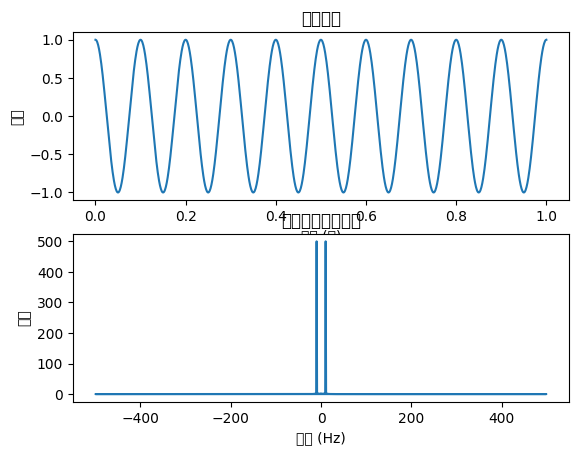

In [67]:
import matplotlib.pyplot as plt

# 繪製原始信號
plt.subplot(2, 1, 1)
plt.plot(t, signal)
plt.title('原始信號')
plt.xlabel('時間 (秒)')
plt.ylabel('振幅')

# 繪製傅立葉變換的頻譜
plt.subplot(2, 1, 2)
plt.plot(freqs, np.abs(fft_signal))
plt.title('傅立葉變換的頻譜')
plt.xlabel('頻率 (Hz)')
plt.ylabel('振幅')

plt.show()


c:\Users\e4903\Desktop\code\venv_stock\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 30456 (\N{CJK UNIFIED IDEOGRAPH-76F8}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\e4903\Desktop\code\venv_stock\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 20301 (\N{CJK UNIFIED IDEOGRAPH-4F4D}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


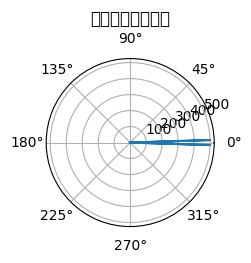

In [68]:
# 繪製傅立葉變換的相位
plt.subplot(2, 1, 2, projection='polar')
plt.plot(np.angle(fft_signal), np.abs(fft_signal))
plt.title('傅立葉變換的相位')
plt.show()
